KBO 공식 홈페이지에서 선수들의 기록 크롤링 



In [26]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [11]:
def get_soup(url):
    response = requests.get(url)
    if response.status_code == 200:
        html = response.content
        soup = BeautifulSoup(html, 'html.parser')
    else : 
        print(response.status_code)
    return soup

def get_data_col(soup,col_list):
    for col_data in soup:
        try:
            col = col_data.attrs['data-id']
            #print(col)
            if col not in col_list:
                col_list.append(col)
            else:
                return col_list,len(col_list)
        except:
            pass
        
def insert_data(soup , start_idx , end_idx,data_frame, col_list):
    for i in range(start_idx, end_idx):
        data_list = []
        for data in soup.find_all(attrs={'data-id':col_list[i]}):
            data_list.append(data.text)
        data_frame[col_list[i]] = data_list
        
def get_dataframe(url):
    
    col_list = []
    soup_p1 = get_soup(url[0])
    soup_p2 = get_soup(url[1])

    data_list_p1 = soup_p1.find_all('td')
    data_list_p2 = soup_p2.find_all('td')[4:]
    
    
    col_list , p1_col_len = get_data_col(data_list_p1,col_list)
    col_list , col_len = get_data_col(data_list_p2,col_list)
    
    data_frame = pd.DataFrame() 

    insert_data(soup_p1,0,p1_col_len,data_frame,col_list)
    insert_data(soup_p2,p1_col_len,col_len,data_frame,col_list)
    
    return data_frame
url_2021 = ['https://www.koreabaseball.com/Record/Player/PitcherBasic/Basic1.aspx',
'https://www.koreabaseball.com/Record/Player/PitcherBasic/Basic2.aspx']
url_2020 = ['https://www.koreabaseball.com/Record/Player/PitcherBasic/Basic1.aspx',
'https://www.koreabaseball.com/Record/Player/PitcherBasic/Basic2.aspx']

data_2021 = get_dataframe(url_2021)
data_2020 = get_dataframe(url_2020)
data_2020

,ERA_RT,GAME_CN,W_CN,L_CN,SV_CN,HOLD_CN,WRA_RT,INN2_CN,HIT_CN,HR_CN,...,PA_CN,PIT_CN,OAVG_RT,H2_CN,H3_CN,SH_CN,SF_CN,IB_CN,WP_CN,BK_CN
0,2.36,22,12,4,0,0,0.750,137 1/3,104,11,...,552,2278,0.208,18,0,2,2,0,7,0
1,2.59,23,12,4,0,0,0.750,132,120,13,...,548,2132,0.245,22,1,5,3,1,5,0
2,2.66,24,13,7,0,0,0.650,142,127,11,...,570,2202,0.244,16,0,7,2,2,7,0
3,2.75,19,8,8,0,0,0.500,114 2/3,117,5,...,495,1852,0.268,17,2,5,4,1,1,1
4,2.88,21,12,5,0,0,0.706,128,118,9,...,523,2024,0.247,27,0,4,2,0,3,1
5,2.93,23,12,4,0,0,0.750,138,129,9,...,586,2313,0.243,19,2,2,3,2,5,0
6,3.01,23,12,8,0,0,0.600,140 2/3,121,11,...,585,2299,0.227,19,0,1,1,0,4,2
7,3.06,22,10,2,0,0,0.833,123 1/3,119,14,...,521,2094,0.250,22,3,4,2,1,0,0
8,3.11,20,11,4,0,0,0.733,130 1/3,106,6,...,517,1869,0.223,15,2,2,4,1,1,0
9,3.14,26,10,7,0,0,0.588,143 1/3,126,8,...,623,2622,0.232,22,2,7,3,0,12,0


In [ ]:
# 연도별로 투수기록data를 불러오는 것은 실패 

### 엑셀파일 불러오기

In [34]:
df_excel = pd.read_excel('C:/Users/taeh0/Desktop/my future/TH Kim/kbo_2010s_pitcher_data.xlsx')
df_excel = df_excel.drop([df_excel.columns[0],df_excel.columns[5],df_excel.columns[9]],axis=1)
df_excel

,선수명,팀명,ERA,G,L,SV,HLD,IP,H,HR,...,NP,AVG,2B,3B,SAC,SF,IBB,WP,BK,output
0,미란다,두산,2.36,22,4,0,0,137.333333,104,11,...,2278,0.208,18,0,2,2,0,7,0,1
1,백정현,삼성,2.59,23,4,0,0,132.000000,120,13,...,2132,0.245,22,1,5,3,1,5,0,1
2,요키시,키움,2.66,24,7,0,0,142.000000,127,11,...,2202,0.244,16,0,7,2,2,7,0,1
3,로켓,두산,2.75,19,8,0,0,114.666667,117,5,...,1852,0.268,17,2,5,4,1,1,1,0
4,원태인,삼성,2.88,21,5,0,0,128.000000,118,9,...,2024,0.247,27,0,4,2,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,송승준,롯데,4.39,27,6,0,0,168.000000,156,20,...,2715,0.251,24,2,13,4,4,10,0,1
244,장원준,롯데,4.43,26,6,0,0,144.333333,158,24,...,2384,0.283,19,1,7,2,2,3,1,1
245,로페즈,KIA,4.66,27,10,1,0,166.000000,180,22,...,2600,0.282,35,3,18,5,2,2,1,0
246,번사이드,넥센,5.34,29,10,0,0,140.000000,150,16,...,2608,0.279,24,2,9,8,0,8,1,1


In [35]:
#데이터 나누기
split_count = int(df_excel.shape[0]*0.8)
train = df_excel[:split_count].copy()
test  = df_excel[split_count:].copy()
feature_names = train.columns[2:-1]
label_name = train.columns[-1]
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]
y_test = test[label_name]

sklearn 불러오기

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model = DecisionTreeClassifier()
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

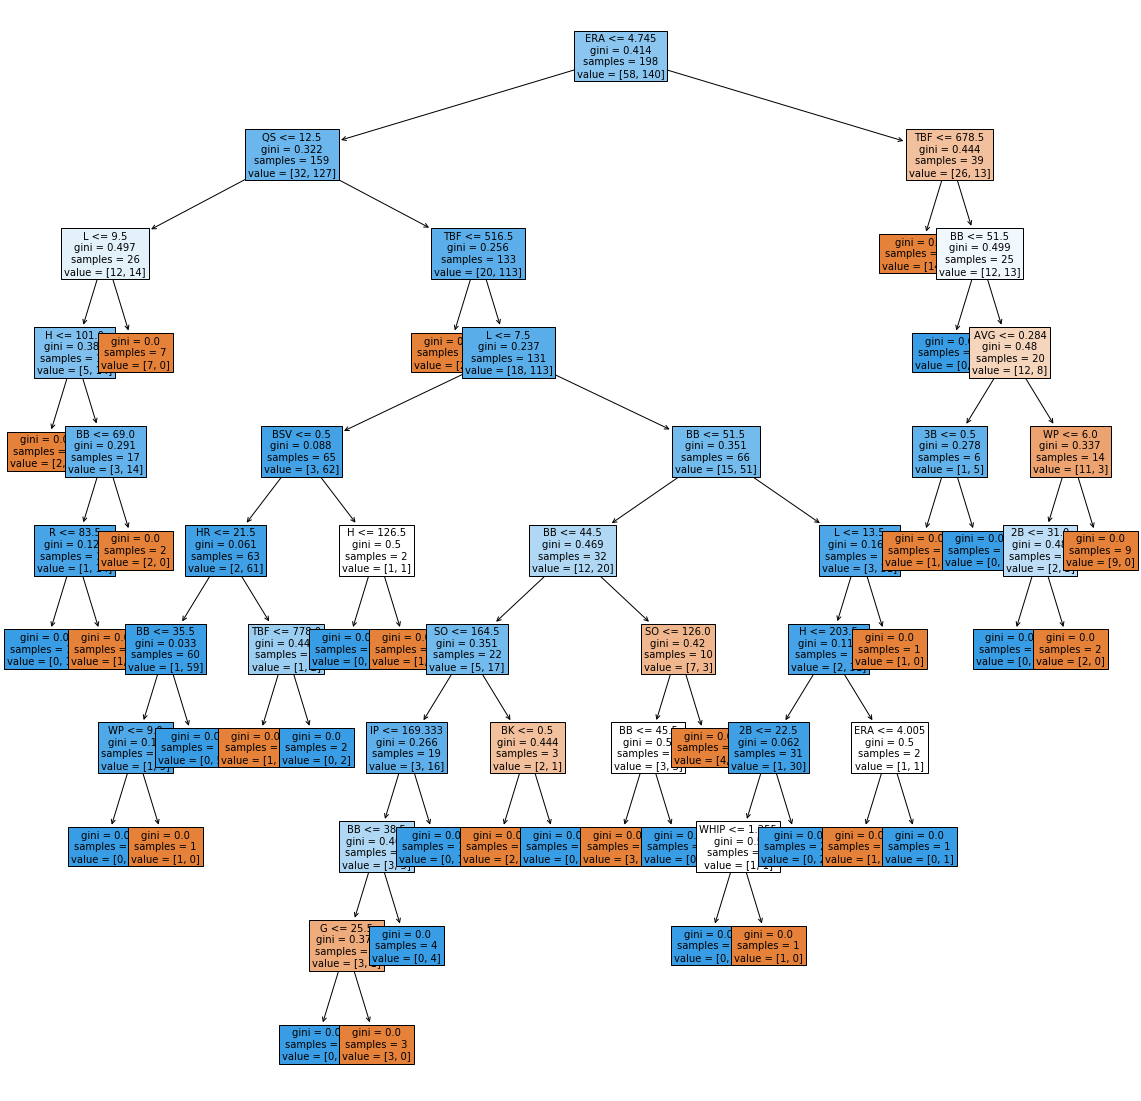

In [41]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names,
                           filled=True, 
                           fontsize=10)


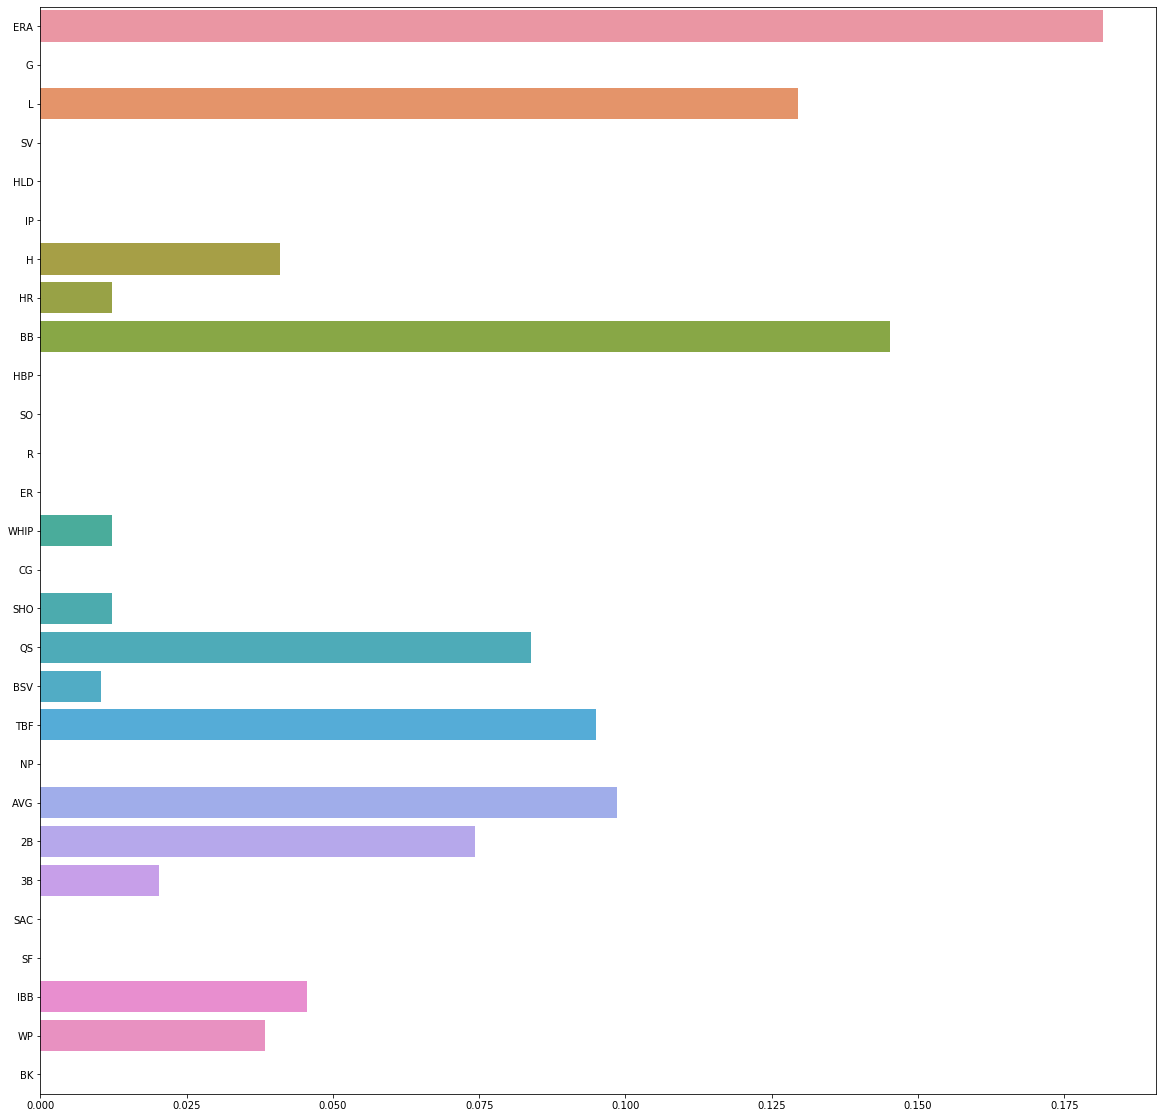

In [43]:
plt.figure(figsize=(20,20))

sns.barplot(x=model.feature_importances_, y=feature_names)